In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv("Shut in lifts incidents attended by LFB in last 36 months (1).csv", encoding= 'unicode_escape')

# dropping all columns except DateTimeOfCall
df = df[['DateTimeOfCall']]

# extracting date from DateTimeOfCall
import re

incident_date = []
date_pattern = r'(\d{2}/\d{2}/\d{4}) (\d{2}):(\d{2})'

for t in df['DateTimeOfCall']:
    match = re.match(date_pattern, t)
    if(match):
        incident_date.append(match.group(1))
        
df['date'] = incident_date
df.drop('DateTimeOfCall', axis = 1, inplace = True)
df.head()

,date
0,01/10/2018
1,01/10/2018
2,01/10/2018
3,01/10/2018
4,01/10/2018


In [187]:
X_idx = 0; y_idx = 1

data_dict = {}

for date in df['date']:
      
      key = date
      data_dict[key] = [date, 0]

for idx in range(len(df['date'])):
    
    key = df.loc[idx, 'date']

    if key in data_dict.keys():
        data_dict[key][y_idx] += 1
    else:
        print("Error: The key " + key + " does not exist in the dictionary. Count aborted!")
        break

In [188]:
del df
df = pd.DataFrame()
df['ds'] = np.array([data_dict[idx][X_idx] for idx in data_dict.keys()])
df['y'] = np.array([data_dict[idx][y_idx] for idx in data_dict.keys()])

df['ds'] = pd.to_datetime(df['ds'], format = '%d/%m/%Y')
df.head()

,ds,y
0,2018-10-01,16
1,2018-10-02,17
2,2018-10-03,13
3,2018-10-04,11
4,2018-10-05,15


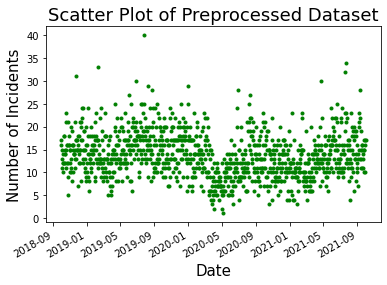

In [189]:
# create scatter plot of preprocessed dataset
fig, ax = plt.subplots()
ax.plot_date(df['ds'], df['y'], color='g', marker='.')
fig.autofmt_xdate()
plt.title('Scatter Plot of Preprocessed Dataset', size = 18)
plt.xlabel ( 'Date', size = 15 )
plt.ylabel ( 'Number of Incidents', size = 15 )
plt.show()

In [190]:
df_train = df.iloc[:1004,:]
df_test = df.iloc[1004:,:]

In [191]:
from prophet import Prophet

m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df_train)

In [192]:
future = m.make_future_dataframe ( periods = 92, freq = 'D' )
forecast = m.predict ( future ) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-01,15.817645,7.301286,23.326333,15.817645,15.817645,-0.413806,-0.413806,-0.413806,-0.699068,-0.699068,-0.699068,-1.035803,-1.035803,-1.035803,1.321065,1.321065,1.321065,0.0,0.0,0.0,15.403839
1,2018-10-02,15.819072,7.238999,23.107899,15.819072,15.819072,-0.423526,-0.423526,-0.423526,-0.699068,-0.699068,-0.699068,-0.923944,-0.923944,-0.923944,1.199486,1.199486,1.199486,0.0,0.0,0.0,15.395545
2,2018-10-03,15.820498,7.472265,23.095999,15.820498,15.820498,-0.321623,-0.321623,-0.321623,-0.699068,-0.699068,-0.699068,-0.694167,-0.694167,-0.694167,1.071612,1.071612,1.071612,0.0,0.0,0.0,15.498875
3,2018-10-04,15.821924,6.903440,23.324129,15.821924,15.821924,-0.800457,-0.800457,-0.800457,-0.699068,-0.699068,-0.699068,-1.041367,-1.041367,-1.041367,0.939978,0.939978,0.939978,0.0,0.0,0.0,15.021467
4,2018-10-05,15.823351,9.673051,25.036832,15.823351,15.823351,1.129687,1.129687,1.129687,-0.699068,-0.699068,-0.699068,1.021652,1.021652,1.021652,0.807103,0.807103,0.807103,0.0,0.0,0.0,16.953037


In [193]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1091,2021-09-26,16.614885,10.023902,25.454422,16.215428,17.006490,0.728189,0.728189,0.728189,-0.699068,-0.699068,-0.699068,-0.312994,-0.312994,-0.312994,1.740251,1.740251,1.740251,0.0,0.0,0.0,17.343074
1092,2021-09-27,16.627872,8.044925,25.529649,16.224638,17.024469,-0.054900,-0.054900,-0.054900,-0.699068,-0.699068,-0.699068,-1.035803,-1.035803,-1.035803,1.679971,1.679971,1.679971,0.0,0.0,0.0,16.572971
1093,2021-09-28,16.640858,8.408900,24.891088,16.233905,17.042686,-0.019962,-0.019962,-0.019962,-0.699068,-0.699068,-0.699068,-0.923944,-0.923944,-0.923944,1.603051,1.603051,1.603051,0.0,0.0,0.0,16.620896
1094,2021-09-29,16.653845,8.444165,25.149227,16.243171,17.061636,0.118018,0.118018,0.118018,-0.699068,-0.699068,-0.699068,-0.694167,-0.694167,-0.694167,1.511253,1.511253,1.511253,0.0,0.0,0.0,16.771863
1095,2021-09-30,16.666831,8.358456,24.583619,16.252438,17.080534,-0.333818,-0.333818,-0.333818,-0.699068,-0.699068,-0.699068,-1.041367,-1.041367,-1.041367,1.406617,1.406617,1.406617,0.0,0.0,0.0,16.333013


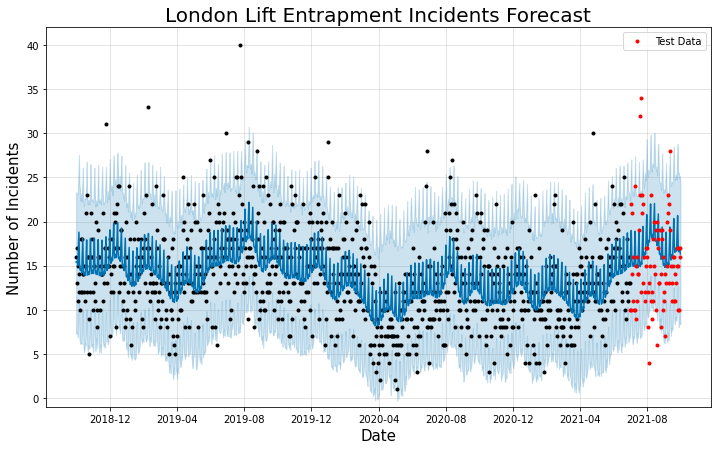

In [194]:
plot_1_London = m.plot(forecast)
ax = plot_1_London.gca()
ax.plot_date(df_test['ds'], df_test['y'], color='r', marker='.', label = 'Test Data')
ax.set_title("London Lift Entrapment Incidents Forecast", size=20)
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Number of Incidents", size=15)
ax.set_ylim(-1, 42)
ax.legend()